# Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import distribution_generator as dg
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



from random import lognormvariate, normalvariate

from sklearn.neighbors import KernelDensity

import imports
import os
import json

from IPython.display import Audio
sound_file = './call.wav'
ALLERT = Audio(url=sound_file, autoplay=True)

In [2]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

# Read part

In [3]:
def plotDensity(densities, log_flag = False, height = 4, width = 12, left = None, right = None, axes_limits = None,
               colors = None, name = None):
    
    if type(densities[0]) != list and type(densities[0]) != np.ndarray:
        densities = [densities]
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_subplot(1,1,1)

    if axes_limits:
        ax.axis(axes_limits)
        ax = plt.gca()
        ax.set_autoscale_on(False)

    if left is None:
        left = 0
    if right is None:
        right = len(densities[0])
        
    for i in range(len(densities)):
        density = densities[i]
        if colors is None:
            ax.plot(density[left : right])
        else:
            ax.plot(density[left : right], colors[i])
   
    if not name is None: 
        fig.savefig(name)
    if log_flag:
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.show()

In [7]:
runs_dir = "/home/anton/azul/New_config_latency_runs/"
run_file_name = "a.rd"
x, curr_pdf, curr_cdf = imports.readRD(run_file_name, runs_dir, scale = True)

asasas


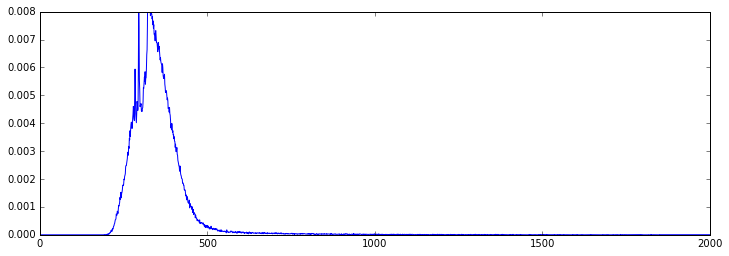

In [5]:
plotDensity(curr_pdf,
           axes_limits = [0, 2000, 0, 0.008])

In [6]:
curr_pdf

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [8]:
runs_dir = "/home/anton/azul/New_config_latency_runs/all0408RD/"


runs = dict(zip(['Dev', 'Granada', 'Highlander'], [[],[],[]]))

for run_file_name in os.listdir(runs_dir):
    if run_file_name.endswith("READ.rd"):
        x, curr_pdf, curr_cdf = imports.readRD(run_file_name, runs_dir, scale = True)
        
        
        if run_file_name.split('-')[3] == '600':
            runs[run_file_name.split('-')[0]].insert(0, curr_pdf)
        if run_file_name.split('-')[3] == '1800':
            runs[run_file_name.split('-')[0]].append(curr_pdf)
        
        print run_file_name

asasas
Granada-d-10000-600-2016.04.08-13.27.33-ycsb-run-READ.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.16.33-ycsb-run-READ.rd
asasas
Dev-d-10000-1800-2016.04.08-15.59.41-ycsb-run-READ.rd
asasas
Highlander-d-10000-1800-2016.04.08-08.44.09-ycsb-run-READ.rd
asasas
Granada-d-10000-600-2016.04.08-13.15.11-ycsb-run-READ.rd
asasas
Dev-d-10000-600-2016.04.08-15.34.53-ycsb-run-READ.rd
asasas
Dev-d-10000-600-2016.04.08-15.47.16-ycsb-run-READ.rd
asasas
Granada-d-10000-1800-2016.04.08-14.44.42-ycsb-run-READ.rd
asasas
Highlander-d-10000-600-2016.04.08-08.19.19-ycsb-run-READ.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.48.58-ycsb-run-READ.rd
asasas
Granada-d-10000-600-2016.04.08-13.02.39-ycsb-run-READ.rd
asasas
Dev-d-10000-600-2016.04.08-15.22.26-ycsb-run-READ.rd
asasas
Granada-d-10000-1800-2016.04.08-13.39.55-ycsb-run-READ.rd
asasas
Highlander-d-10000-600-2016.04.08-08.06.57-ycsb-run-READ.rd
asasas
Granada-d-10000-1800-2016.04.08-14.12.18-ycsb-run-READ.rd
asasas
Highlander-d-10000-600-2016

# Usefull Funcs

In [9]:
def searchBoarders(density, i, bw):
    left_boarder = i
    right_boarder = i
    
    if bw % 2 == 0:
        bw += 1
        
    right_saturation = (bw - 1) / 2
    left_saturation = (bw - 1) / 2
    
    while left_saturation > 0 and left_boarder > 0:
        if density[left_boarder] > 0:
            left_saturation -= 1
        left_boarder -= 1
    
    while right_saturation > 0 and right_boarder < len(density) - 1:
        if density[right_boarder] > 0:
            right_saturation -= 1
        right_boarder += 1
        
    if right_saturation == 0 and left_saturation == 0:
        return left_boarder, right_boarder
    elif right_saturation == 0 and left_saturation != 0:
        return max(0, right_boarder - i), right_boarder
    elif left_saturation == 0 and right_saturation != 0:
        return left_boarder, i + i - left_boarder
    else:
        return 0, len(density)

In [10]:
def flattenDensities(densities, bw = 3): 
    #max_bw = np.where(density > 0)[0][0]
    new_densities = []
    
    if type(densities[0]) != np.ndarray and type(densities[0]) != list:
        #print 'Type changing...'
        densities = [densities]
        
    for density in densities:

        new_density = np.zeros(len(density)*2)

        saturation = 0

        for i in range(len(density)):
            if density[i] == 0:
                pass
            else:
                left_boarder, right_boarder = searchBoarders(density, i, bw)
                for j in range(left_boarder, right_boarder):
                    new_density[j] += density[i] / (right_boarder - left_boarder)
        
        new_densities.append(new_density)

    return new_densities
    

In [11]:
def sampleFromDensity(densities, sample_size = 1000, scaling = False, noisy = False, noise_scale = 1.0):
    
    if type(densities[0]) != np.ndarray and type(densities[0]) != list:
        #print 'Type changing...'
        densities = [densities]
    
    sample = np.empty(0)
    for density in densities:
        if scaling:
            density = density / sum(density)
        if noisy:
            noise = generateNoiseMeansPattern(sample_size / len(densities), noise_scale)
        else:
            noise = np.zeros(sample_size / len(densities))
        curr_sample = np.random.choice(range(len(density)), sample_size / len(densities), p = density) + noise
        sample = np.hstack((sample, curr_sample))
    return sample

In [12]:
def densityFromSample(sample, normed = True):
    return np.histogram(sample, bins=round(max(sample) + 1) , 
                        density=True, range = (0, round(max(sample) +1)))

In [13]:
def bootstrap(pdfs, statistics_set, statistics_names, stat_sample_size = 6, sample_size = 1000, scaling = False,
              noisy = False):
    
    if len(statistics_set) != len(statistics_names):
        raise AttributeError("Statistics_names and statistics_set should have the same lenghth,\
        also Statistics_names shold be unique!")
    
    statistics_vals = dict(zip(statistics_names, [[] for _ in range(len(statistics_names))]))
    
    for i in log_progress(range(stat_sample_size), every=1):
        sample = (sampleFromDensity(pdfs, sample_size, scaling = scaling))
        for j in range(len(statistics_set)):
            
            statistics_vals[statistics_names[j]].append(statistics_set[j](sample))
    
    return statistics_vals

In [14]:
def readRDHeader(file_name, file_dir, header_size = 12):
    f = open(file_dir+file_name, 'r')
    header = dict()
    
    for i in range(header_size):
        s = f.readline()
        key = s.split('=')[0]
        val = s.split('=')[1].replace(',', '.')
        if key.endswith('ptile'):
            key = float(key[:-5].replace(',', '.'))
        header[key] = float(val)
    
    return header

In [15]:
def pdfPercentiles(pdf, perc, strat = 'first_higher'):
    perc_normed = float(perc)/ 100
    curr_perc = 0.0
    
    i = 0 
    last_grow = 0
    while curr_perc < perc_normed and i < len(pdf):
        curr_perc += pdf[i]
        if pdf[i] > 0 and curr_perc < perc_normed: 
            last_grow = i
        i += 1
    
    if curr_perc >= perc_normed:
        if strat == 'first_higher':
            return i
        else:
            return last_grow
    else:
        return -1         

In [16]:
def _parseArgs(args):
    return args[0], args[1], args[2]

In [17]:
def genCheck(pdf):
    check = dict()

    check_sample = sampleFromDensity(pdf, sample_size=4000000)
    for i in range(len(stats_funcs)):
        check[stats_names[i]] = stats_funcs[i](check_sample)
        
    return check

# Full algorithm

In [18]:
class Statistic():
    def __init__(self, statistic_function, statistic_name = 'unnamed_statistic'):
        self.statistic_function = statistic_function
        self.name = statistic_name
        
    

In [19]:
class Hypothesis():
    def __init__(self, name, distribution):
        self.name = name
        self.distribution = distribution
    
    def __str__(self):      
        return self.name 

In [20]:
def generateAlternative(base_hypothesis, shift_directions, alpha = 0.01):
    alt_means = dict()
    alt_stds = dict()
    
    for key in shift_directions:
        alt_means[key] = base_hypothesis.means[key] * (1 + alpha * shift_directions[key])
        alt_stds[key] = base_hypothesis.stds[key] 
      
    alternative = Hypothesis(
                                name = 'alternative: ' + ' '.join(map(str, shift_directions.values())),
                                stat_means = alt_means,
                                stat_stds = alt_stds
                                )
    
    return alternative

In [21]:
def sampleFromHypothesis(hypothesis, sample_size = 1):
    sample = dict()
    
    for key in hypothesis.stat_names:
        sample[key] = stats.norm(hypothesis.means[key], hypothesis.stds[key]).rvs(sample_size)
    
    return sample

In [22]:
def singleNPStat(zero, alternative, sample, v = True):
    '''
        Calculate Neyman-Pearson statistic for two normal distributions 
    '''
    
    stat = 0
    
    for key in zero.stat_names:
        if np.log(stats.norm(zero.means[key], zero.stds[key]).pdf(sample[key]) /\
                       stats.norm(alternative.means[key], alternative.stds[key]).pdf(sample[key])) != np.nan:
            stat += np.log(stats.norm(zero.means[key], zero.stds[key]).pdf(sample[key]) /\
                           stats.norm(alternative.means[key], alternative.stds[key]).pdf(sample[key])) /\
                            len(zero.stat_names)
            
        print zero.means[key]
        print alternative.means[key]
        print zero.stds[key]
        #print alternative.stds[key]
        #
        print stats.norm(zero.means[key], zero.stds[key]).pdf(sample[key])
        
        print stats.norm(alternative.means[key], alternative.stds[key]).pdf(sample[key])
        #print stat

    if v:
        print zero.name
        print alternative.name
        print stat
        print "----------------------"
        
    return stat

In [23]:
def NPStatDistribution(zero, alternative, sample_size = 100):
    
    zero_np_stat_samp = np.zeros(sample_size)
    alternative_np_stat_samp = np.zeros(sample_size)
    
    zero_sample = sampleFromHypothesis(zero, sample_size=sample_size)
    alternative_sample = sampleFromHypothesis(alternative, sample_size=sample_size)
    
    
    for i in log_progress(range(sample_size), every = 1):
        for key in zero.stat_names:
            zero_np_stat_samp[i] += np.log(stats.norm(zero.means[key], zero.stds[key]).pdf(zero_sample[key][i]) /\
                                           stats.norm(alternative.means[key], alternative.stds[key]).pdf(zero_sample[key][i])) /\
                                            len(zero.stat_names)
            alternative_np_stat_samp[i] += np.log(stats.norm(zero.means[key], zero.stds[key]).pdf(alternative_sample[key][i]) /\
                            stats.norm(alternative.means[key], alternative.stds[key]).pdf(alternative_sample[key][i])) /\
                            len(zero.stat_names)
          
    zero_np_hist = np.histogram(zero_np_stat_samp, bins=len(zero_np_stat_samp))
    alternative_np_hist = np.histogram(alternative_np_stat_samp, bins = len(zero_np_stat_samp))
    return zero_np_hist, alternative_np_hist

In [24]:
def doAll(base_sample, check, params, base_pdf = None):
    if base_pdf is None:
        base_pdf = densityFromSample(base_sample)[0]
        
    print base_pdf
    statistics_set, statistics_names, bw = _parseArgs(params)
    
    base_pdf_smoothed = flattenDensities(base_pdf, bw=bw)
    
    statistics_vals = bootstrap(base_pdf_smoothed, statistics_set, statistics_names, sample_size=400000)
    
    statistics_means = dict()
    statistics_stds = dict()
    
    for key in statistics_vals:
        statistics_means[key] = np.mean(statistics_vals[key])
        statistics_stds[key] = np.std(statistics_vals[key])
     
    zero_hypothesis = Hypothesis('zero_H', statistics_means, statistics_stds)
    
    ### create two basic alternatives, will improve later
    right_shifts = dict()
    left_shifts = dict()
    for name in statistics_names:
        right_shifts[name] = 1
        left_shifts[name] = -1
    
    right_alternative = generateAlternative(zero_hypothesis, right_shifts, alpha = 0.01)
    left_alternative = generateAlternative(zero_hypothesis, left_shifts, alpha = 0.01)
    
    singleNPStat(zero_hypothesis, right_alternative, check)
    singleNPStat(zero_hypothesis, left_alternative, check)
    
    NP_plot = False
    if NP_plot:
        zero_np_hist, right_alt_np_hist = NPStatDistribution(zero_hypothesis, right_alternative, sample_size = 1000)
        zero_np_hist, left_alt_np_hist = NPStatDistribution(zero_hypothesis, left_alternative, sample_size = 1000)

        plt.bar(zero_np_hist[1][:-1], zero_np_hist[0], align='center', width=np.diff(zero_np_hist[1]),color = 'b', edgecolor = 'b')
        plt.bar(right_alt_np_hist[1][:-1], right_alt_np_hist[0], align='center', width=np.diff(right_alt_np_hist[1]),color = 'g', edgecolor = 'g')
        plt.show()
    
    #print zero_hypothesis
    #print "\n"
    #print right_alternative
 
    

In [25]:
def genGCpauseEmulation(pdf, incr, percentage, sample_size = 4000000):
    sample = sampleFromDensity(pdf, sample_size=sample_size)
    
    increase_num = sample_size * percentage / 100
    
    mask = np.zeros(sample_size)
    
    mask[np.random.randint(0, sample_size, int(increase_num))] = incr
    
    sample += mask
    
    return sample

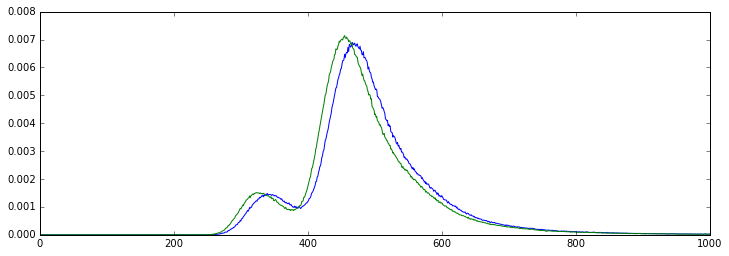

In [26]:
plotDensity([densityFromSample(genGCpauseEmulation(runs['Dev'][0], 20, 100))[0],
             runs['Dev'][0],
            #runs['Dev'][2]
            ],
           axes_limits = [0, 1000, 0, 0.008])

In [23]:
elongated = densityFromSample(genGCpauseEmulation(runs['Dev'][0], 10000, 1))[0]

In [24]:
pdfPercentiles(elongated, 90)

600

In [25]:
pdfPercentiles(runs['Dev'][0], 99.9)

2420

In [29]:
stats_funcs = [#np.mean,
                #lambda x : np.percentile(x, 50),
                #lambda x : np.percentile(x, 90),
    lambda x : np.percentile(x, 99),
                #lambda x : np.percentile(x, 99.9),
              ]
stats_names = [#'mean',
               #50,
               #90,
            99
               #99.9
              ]

In [27]:
import data_processing_utils as utils

oracle_dir = "/home/anton/azul/New_config_latency_runs/OracleRD/"
dev_dir = "/home/anton/azul/New_config_latency_runs/DevRD/"
highlander_dir = "/home/anton/azul/New_config_latency_runs/HighlanderRD/"

oracle_runs = utils.read_multiple(oracle_dir, ["READ"], verbouse=False)
dev_runs = utils.read_multiple(dev_dir, ["READ"], verbouse=False)
highlander_runs = utils.read_multiple(highlander_dir, ["READ"], verbouse=False)

In [30]:
doAll(_, genCheck(dev_runs[0]),
      [stats_funcs, stats_names, 3], 
      dev_runs[1])

[ 0.  0.  0. ...,  0.  0.  0.]


TypeError: __init__() takes exactly 3 arguments (4 given)

In [27]:
pdfPercentiles(densityFromSample(genGCpauseEmulation(runs['Dev'][0], 1000, 10))[0], 99.9)

2587

In [28]:
pdfPercentiles(runs['Dev'][0], 99.9)

2420

In [29]:
doAll(_, genCheck(densityFromSample(genGCpauseEmulation(runs['Dev'][0], 3000, 0.1))[0]),
      [stats_funcs, stats_names, 3], 
      runs['Dev'][0])

[ 0.  0.  0. ...,  0.  0.  0.]


TypeError: __init__() takes exactly 3 arguments (4 given)

In [ ]:

         

doAll(_, genCheck(runs['Dev'][0]), [stats_funcs, stats_names, 3], runs['Dev'][1])
#doAll(_, genCheck(runs['Granada'][0]), [stats_funcs, stats_names, 3], runs['Highlander'][0])

#print '\nHighlander \n \n'
#doAll(_, genCheck(runs['Highlander'][1]), [stats_funcs, stats_names, 3], runs['Highlander'][0])
#doAll(_, genCheck(runs['Highlander'][2]), [stats_funcs, stats_names, 3], runs['Highlander'][0])
#doAll(_, genCheck(runs['Highlander'][3]), [stats_funcs, stats_names, 3], runs['Highlander'][0])

In [ ]:
samp = sampleFromDensity(runs['Highlander'][0])

In [ ]:
densityFromSample(samp)[0]

In [233]:
doAll(_,  genCheck(runs['Dev'][0] , [stats_funcs, stats_names, 3], runs['Highlander'][0])

SyntaxError: non-keyword arg after keyword arg (<ipython-input-233-5eeef46aea44>, line 1)

In [45]:
np.mean(sampleFromDensity(runs['Dev'][0], sample_size = 10000))

489.1189

In [325]:
np.mean(sampleFromDensity(runs['Highlander'][3], sample_size = 10000))

503.32679999999999

In [28]:
np.random.randint(0, 100000, 2)

array([16510, 83058])

# EXPERIMNETS AGAIN

In [60]:
a = []
for i in range(6):
    a.append(pdfPercentiles(runs['Granada'][i], 50))

In [31]:
np.log(/ np.inf)


SyntaxError: invalid syntax (<ipython-input-31-08fcec1c5d4d>, line 1)

In [61]:
np.std(a)

2.5819888974716112

(65535,)

In [32]:
def CrossValidation(pdfs):
    summary = sum(pdfs)
    
    for i in range(len(pdfs)):
        print i
        doAll(_,  genCheck(pdfs[i]) , [stats_funcs, stats_names, 3], (summary - pdfs[i])/(len(pdfs) - 1))

In [33]:
CrossValidation(runs['Dev'])

0
[ 0.  0.  0. ...,  0.  0.  0.]


TypeError: __init__() takes exactly 3 arguments (4 given)

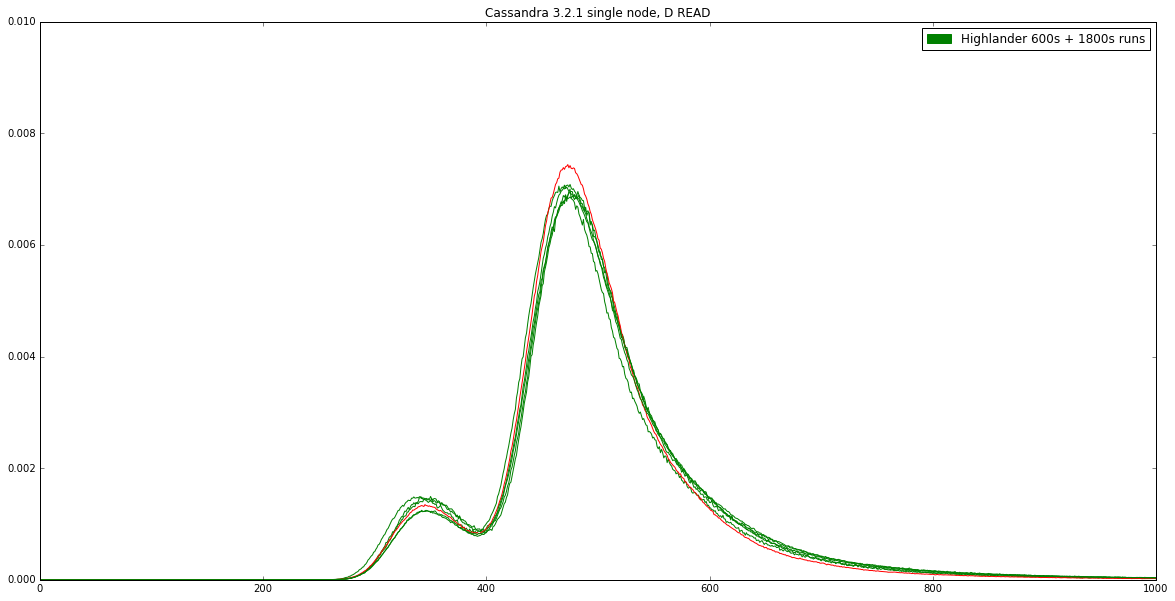

In [102]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

axes_limits = [0,1000, 0, 0.01]
colors = ['g']*6
colors[3] = 'r'
densities = runs['Highlander'] 

if len(axes_limits) == 4: 
    ax.axis(axes_limits)
    ax = plt.gca()
    ax.set_autoscale_on(False)

for i in range(len(densities)):
    density = densities[i]
    if colors is None:
        ax.plot(density)
    else:
        ax.plot(density, colors[i])

#red_patch = mpatches.Patch(color='red', label='Dev 600s + 1800s runs')
#blue_patch = mpatches.Patch(color='blue', label='Granada 600s + 1800s runs')
green_patch = mpatches.Patch(color='green', label='Highlander 600s + 1800s runs')
ax.legend(handles=[green_patch])#[red_patch, blue_patch, green_patch])
ax.set_title("Cassandra 3.2.1 single node, D READ", loc = 'center')

fig.savefig('DevHlanderGran.png')

In [122]:
def generateNoiseMeansPattern(lenght, scale=1):
    s = 0
    s_l = np.zeros(lenght)
    
    BD = stats.bernoulli(0.5)
    
    for i in range(lenght):
        s += (BD.rvs() - 0.5) * scale
        s_l[i] = s
    
    return s_l

In [156]:
d = densityFromSample(sampleFromDensity(runs['Highlander'][0], sample_size= 100000, noisy = True, noise_scale= 0.3))

In [177]:
d2 = densityFromSample(sampleFromDensity(runs['Highlander'][0], sample_size= 100000, noisy = True, noise_scale=0.1))

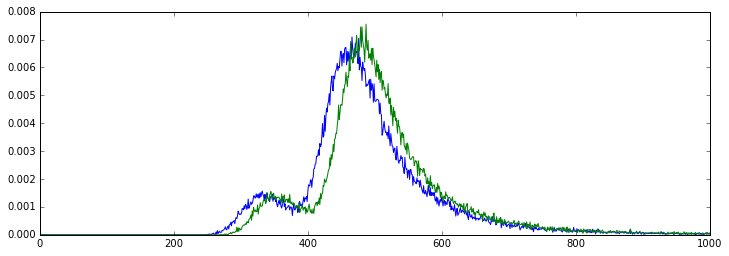

In [178]:
plotDensity([d[0], d2[0]],
             axes_limits = [0, 1000, 0, 0.008])

In [203]:
samples = []
for i in log_progress(range(20), every = 1):
    samples.append(sampleFromDensity(runs['Highlander'][0], sample_size= 100000, noisy = True, noise_scale= 0.1))

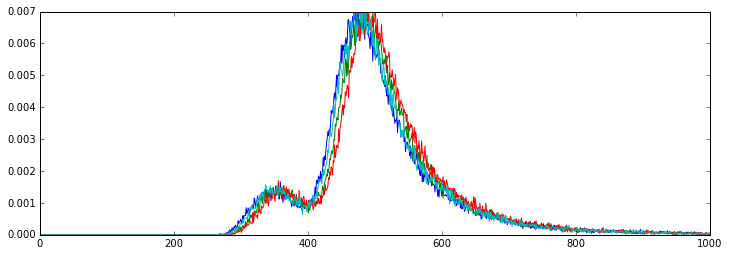

In [198]:
plotDensity(denn[:4]
            ,
            axes_limits = [0, 1000, 0, 0.007]
           )

In [193]:
denn = [den[i][0] for i in range(len(den))]

In [200]:
m = [np.mean(denn[i]) for i in range(20)]

In [201]:
m

[4.78148608587549e-05,
 4.1018909717379707e-05,
 3.6127167630057813e-05,
 1.8135654697134564e-05,
 4.1015544891513881e-05,
 3.9987204094689698e-05,
 2.0186115989422473e-05,
 3.8170852736850135e-05,
 5.7054829691333371e-05,
 4.112011184670422e-05,
 5.0950221633464103e-05,
 3.9813672014969937e-05,
 3.9618081692484448e-05,
 5.0100200400801596e-05,
 4.0003200256020489e-05,
 4.1101520756267974e-05,
 4.1933995890468405e-05,
 2.707605664311049e-05,
 5.1783957330019154e-05,
 4.362621062734491e-05]

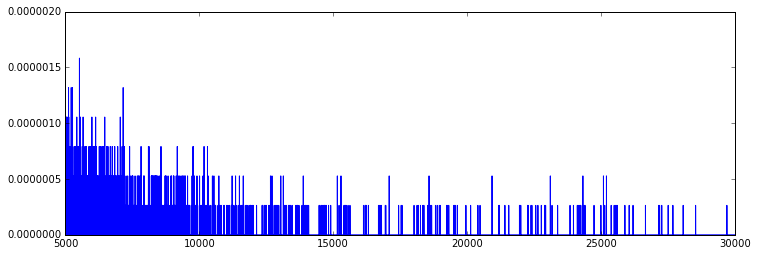

In [33]:
plotDensity(runs["Highlander"][0],
           axes_limits = [5000, 30000, 0, 0.000002])

In [23]:
aaaa = runs["Highlander"][0]

In [44]:
from sklearn.neighbors.kde import KernelDensity

kd = KernelDensity(bandwidth=100, kernel='tophat')
kd.fit(aaaa.reshape(-1, 1))

KernelDensity(algorithm='auto', atol=0, bandwidth=100, breadth_first=True,
       kernel='tophat', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

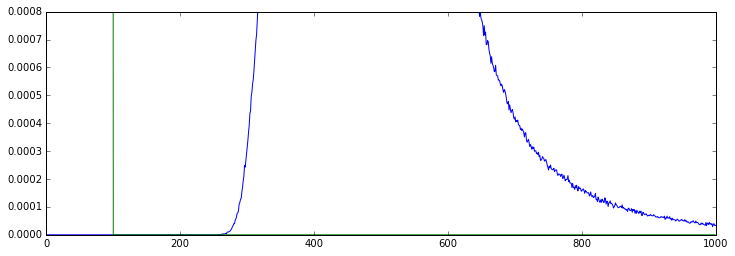

In [46]:
plotDensity([aaaa,
             np.exp(kd.score_samples(np.linspace(0, 1000,1000).reshape(-1,1)))
            ],
           axes_limits = [0, 1000, 0, 0.0008])

In [61]:
d = kd.score_samples(np.linspace(0, 40000,40000)[:, np.newaxis])

In [63]:
sum(np.exp(d))

0.69946418791254472

In [47]:
N = 20
X = np.concatenate((np.random.normal(0, 1, 0.3 * N),
                    np.random.normal(5, 1, 0.7 * N)))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

/home/anton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/anton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [1]:
s = "read_and go away"

In [4]:
any(["r", " go"] in s)

TypeError: 'in <string>' requires string as left operand, not list

In [5]:
def __strings_in_string(string_list, base_string):
    checks = [check_string in base_string for check_string in string_list]
    return all(checks)

In [7]:
__strings_in_string(["r", " go", "hui"],s)

False

In [28]:
len(flattenDensities(runs["Highlander"][1])[0])

131070

In [29]:
len(runs["Highlander"][1])

65535

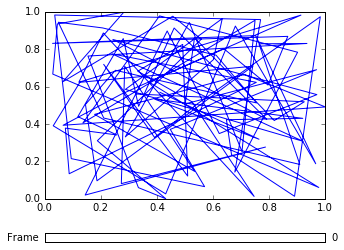

In [30]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
# fake data
xdata = numpy.random.rand(100,100) 
ydata = numpy.random.rand(100,100) 
# set up figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.autoscale(True)
plt.subplots_adjust(left=0.25, bottom=0.25)

# plot first data set
frame = 0
ln, = ax.plot(xdata[frame],ydata[frame])

# make the slider
axframe = plt.axes([0.25, 0.1, 0.65, 0.03])
sframe = Slider(axframe, 'Frame', 0, 99, valinit=0,valfmt='%d')

# call back function
def update(val):
    frame = numpy.floor(sframe.val)
    ln.set_xdata(xdata[frame])
    ln.set_ydata((frame+1)* ydata[frame])
    ax.set_title(frame)
    ax.relim()
    ax.autoscale_view()
    plt.draw()

# connect callback to slider   
sframe.on_changed(update)
plt.show()